In [139]:
import pandas as pd

In [140]:
feature_translation_dict = {
    'תחום גאוגרפי': 'Geographic area',
    'סוג דרך': 'Road type',
    'סמל ישוב': 'Settlement code',
    'רחוב 1': 'Street 1',
    'רחוב 2': 'Street 2',
    'צומת עירוני': 'Urban intersection',
    'דרך לא עירונית 1': 'Non-urban road 1',
    'דרך לא עירונית 2': 'Non-urban road 2',
    'קמ': 'Kilometer',
    'צומת לא עירוני': 'Non-urban intersection',
    'יחידה משטרתית': 'Police unit',
    'חודש תאונה': 'Accident month',
    'שעה': 'Hour',
    'סוג יום': 'Day type',
    'יום/לילה': 'Day/night',
    'יום בשבוע': 'Day in the week',
    'חומרת התאונה': 'Accident severity',
    'סוג תאונה': 'Accident type',
    'דרך חד מסלולית (חלופה לדרך רב מסלולית)': 'Single-lane road',
    'דרך רב מסלולית (חלופה לדרך חד מסלולית)': 'Multi-lane road',
    'מהירות מותרת': 'Speed limit',
    'תקינות הדרך': 'Road condition',
    'רוחב הכביש': 'Road width',
    'סימון/תימרור': 'Signs/markings',
    'תאורה': 'Lighting',
    'מזג אויר': 'Weather',
    'מצב פני הכביש': 'Road surface condition',
    'סוג העצם (רק בסוג תאונה 8)': 'Object type (accident type 8 only)',
    'מרחק העצם (רק בסוג תאונה 8)': 'Object distance (accident type 8 only)',
    'לא חצה (רק בסוג תאונה1, חלופה לאופן חצייה)': 'Did not cross (accident type 1 only)',
    'אופן חציה (רק בסוג תאונה1, חלופה ללא חצה)': 'Crossing method (accident type 1 only)',
    'מקום חציה (רק בסוג תאונה 1)': 'Crossing location (accident type 1 only)',
    'כיוון חציה (רק בסוג תאונה 1)': 'Crossing direction (accident type 1 only)',
    'מחוז (רק בסוג דרך 1,2)': 'District (road type 1,2)',
    'נפה (רק בסוג דרך 1,2)': 'Region (road type 1,2)',
    'אזור טבעי (רק בסוג דרך 1,2)': 'Natural area (road type 1,2)',
    'מעמד מוניצפלי (רק בסוג דרך 1,2)': 'Municipal status (road type 1,2)',
    'צורת ישוב (רק בסוג דרך 1,2)': 'Settlement type (road type 1,2)',
    # Adding translations for unmatched features
    'pk_teuna_fikt': 'Accident ID',
    'sug_tik': 'Case type',
    'BAYIT': 'House number',
    'SHNAT_TEUNA': 'Accident year',
    'STATUS_IGUN': 'Location status',
    'X': 'Longitude',
    'Y': 'Latitude',
}

In [141]:
import pandas as pd
from googletrans import Translator

# Function to normalize strings for consistent matching
def normalize_string(s):
    return s.strip().lower() if isinstance(s, str) else s

# Function to translate words to English using Google Translator
translator = Translator()

def translate_to_english(word):
    try:
        result = translator.translate(word, src="he", dest="en")
        return result.text
    except Exception as e:
        print(f"Error translating '{word}': {e}")
        return word  # Return the original word if translation fails

# Function to process, translate, and display the dataset info
def process_and_translate(file_path, dictionary_path):
    """
    Processes a dataset by loading it, translating its features to English,
    and printing the number of non-empty rows and a list of features in English.
    """
    # Load the dataset
    data = pd.read_csv(file_path)

    # Normalize column names in the dataset
    data.columns = [normalize_string(col) for col in data.columns]

    # Load the translation dictionary from the Excel file
    dictionary_df = pd.read_excel(dictionary_path, sheet_name='H20221041AccCodebook')
    translations = dictionary_df[['Unnamed: 3', 'Unnamed: 2']].dropna().rename(
        columns={'Unnamed: 3': 'Feature_Hebrew', 'Unnamed: 2': 'Feature_English'}
    )
    dynamic_translation_dict = dict(
        zip(
            [normalize_string(x) for x in translations['Feature_Hebrew']],
            translations['Feature_English']
        )
    )

    # Normalize keys in the predefined dictionary
    normalized_feature_translation_dict = {
        normalize_string(k): v for k, v in feature_translation_dict.items()
    }

    # Combine with the normalized dynamic dictionary
    combined_translation_dict = {**dynamic_translation_dict, **normalized_feature_translation_dict}

    # Debug: Check unmatched columns
    unmatched_features = [col for col in data.columns if col not in combined_translation_dict]
    print(f"Unmatched features (not in dictionary): {unmatched_features}")

    # Translate the dataset
    translated_data = data.rename(columns=lambda col: combined_translation_dict.get(normalize_string(col), f"Untranslated: {col}"))

    # Translate any remaining unmatched columns to English dynamically
    translated_data.columns = [translate_to_english(col) for col in translated_data.columns]

    # Count non-empty rows
    non_empty_rows = translated_data.dropna(how='all').shape[0]

    # Get translated features
    translated_features = translated_data.columns.tolist()

    # Print the results
    print(f"File: {file_path}")
    print(f"Number of non-empty rows: {non_empty_rows}")
    print("Features (columns) in English:")
    for feature in translated_features:
        print(f"- {feature}")
    print("\n")
    return translated_data


In [142]:
# Process files for 2018
file_path_2018 = './Datasets/Data_accidents_israel_by_year/2018/2018_data.csv'
dictionary_path_2018 = './Datasets/Data_accidents_israel_by_year/2018/data-dict-2018.xlsx'
translated_data_2018 = process_and_translate(file_path_2018, dictionary_path_2018)

# Process files for 2019
file_path_2019 = './Datasets/Data_accidents_israel_by_year/2019/2019_data.csv'
dictionary_path_2019 = './Datasets/Data_accidents_israel_by_year/2019/data-dict-2019.xlsx'
translated_data_2019 = process_and_translate(file_path_2019, dictionary_path_2019)

# Process files for 2020
file_path_2020 = './Datasets/Data_accidents_israel_by_year/2020/2020_data.csv'
dictionary_path_2020 = './Datasets/Data_accidents_israel_by_year/2020/data-dict-2020.xlsx'
translated_data_2020 = process_and_translate(file_path_2020, dictionary_path_2020)

# Process files for 2021
file_path_2021 = './Datasets/Data_accidents_israel_by_year/2021/2021_data.csv'
dictionary_path_2021 = './Datasets/Data_accidents_israel_by_year/2021/data-dict-2021.xlsx'
translated_data_2021 = process_and_translate(file_path_2021, dictionary_path_2021)

# Process files for 2022
file_path_2022 = './Datasets/Data_accidents_israel_by_year/2022/2022_data.csv'
dictionary_path_2022 = './Datasets/Data_accidents_israel_by_year/2022/data-dict-2022.xlsx'
translated_data_2022 = process_and_translate(file_path_2022, dictionary_path_2022)

# Path to the file
data_path = './Datasets/Road_accidents_data_5_years/accid_taz (2).csv'
dictionary_path = './Datasets/Road_accidents_data_5_years/accid_taz_metadata (1).xlsx'  # Replace with actual dictionary path

# Call the process_and_translate function
# translated_taz_data = process_and_translate(data_path, dictionary_path)


Unmatched features (not in dictionary): []
File: ./Datasets/Data_accidents_israel_by_year/2018/2018_data.csv
Number of non-empty rows: 12596
Features (columns) in English:
- ACCIDENT ID
- CASE TYPE
- A geographical field
- Type through
- Symbol Sittle
- 1 Street
- 2th Street
- House Number
- Urban junction
- A non -urban way 1
- A non -urban way 2
- Km
- Non -urban node
- A police unit
- Accident year
- An accident month
- time
- Day type
- Day/night
- A day of the week
- The severity of the accident
- An accident type
- A one -track way (an alternative to multi -trail)
- Multi -track (an alternative to one -way way)
- Speed ​​is permitted
- The roadblocks
- The width of the road
- Simon/Thimler
- lighting
- weather
- The mode of road
- Bone type (only in the type of accident 8)
- Bone Distance (only in the type of accident 8)
- Did not cross (only in the type of accident 1, an alternative to a crosswalk)
- A halfway (only in the type of accident 1, an alternative without crossing)
- A


Road accidents investigated by the police and collected by the Central Bureau of Statistics (CBS) (Extended Road Accidents Database) over the past five years. Mapped at a detailed level and at the level of kilometer markers, aggregated by traffic zones based on the National Transportation Model.

In [143]:
import pandas as pd

# Path to the file
data_path = './Datasets/Road_accidents_data_5_years/accid_taz (2).csv'

# Load the dataset (CSV)
taz_data = pd.read_csv(data_path)

# Count non-empty rows in the dataset
non_empty_rows_taz = taz_data.dropna(how='all').shape[0]
print(f"Number of non-empty rows in the dataset (accid_taz): {non_empty_rows_taz}")

# Extract features (columns) from the dataset and print them in column format
features_taz = taz_data.columns.tolist()
print("Features (columns) in the dataset (accid_taz):")
for feature in features_taz:
    print(f"- {feature}")


Number of non-empty rows in the dataset (accid_taz): 2637
Features (columns) in the dataset (accid_taz):
- OID
- SUMACCIDEN
- ID
- CITY
- MainUse
- POP_2018
- TAZAREA
- USETYPE
- CITYCODE
- USETYPECOD
- DEAD
- SEVER_INJ
- SLIGH_INJ
- PEDESTRINJ
- INJ0_19
- INJ20_64
- INJ65_
- INJTOTAL
- TOTDRIVERS
- MOTORCYCLE
- TRUCK
- BICYCLE
- PRIVATE
- VEHICLE
- ACC_INDEX
- YEARMONTH
- Shape_Length
- Shape_Area


Total number of non-empty rows in the combined dataset: 58060


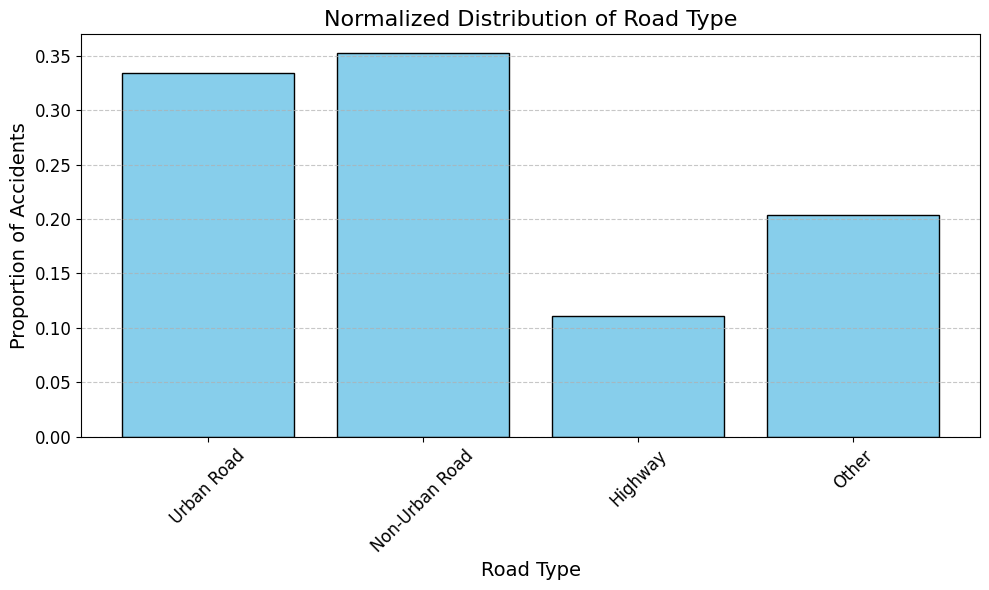

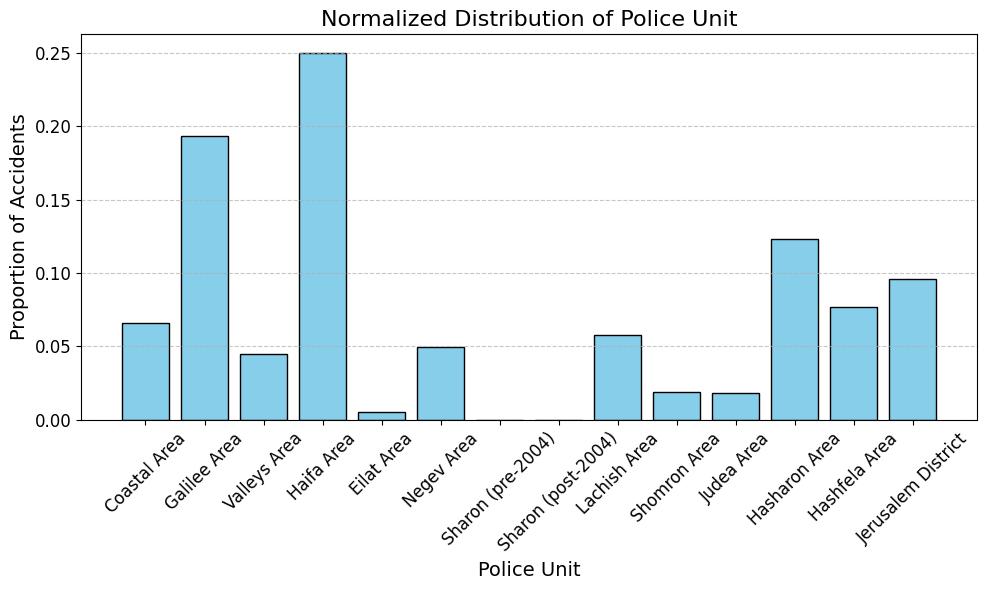

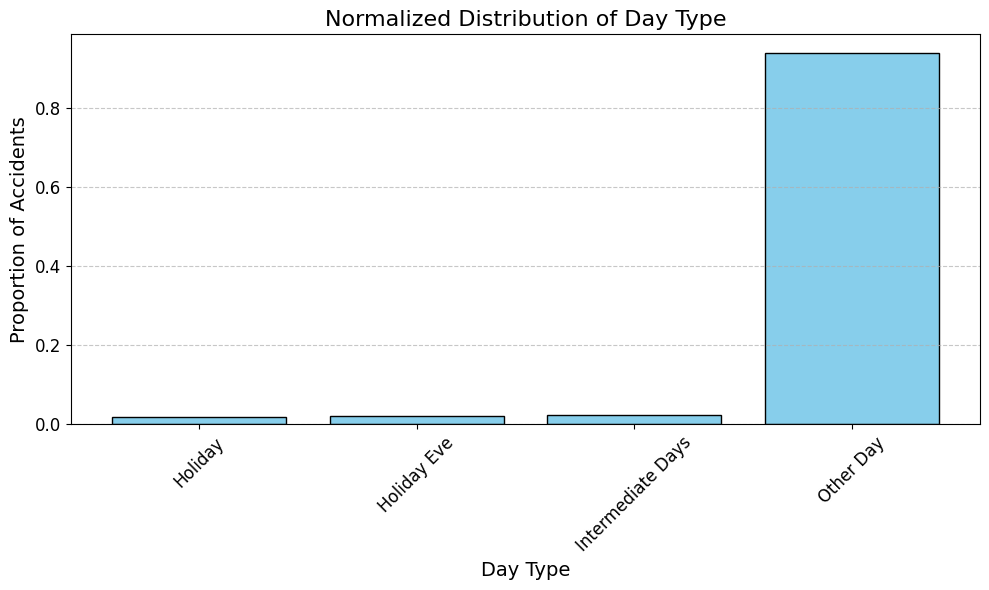

Field 'MERKAZI' is missing from the dataset. Skipping...


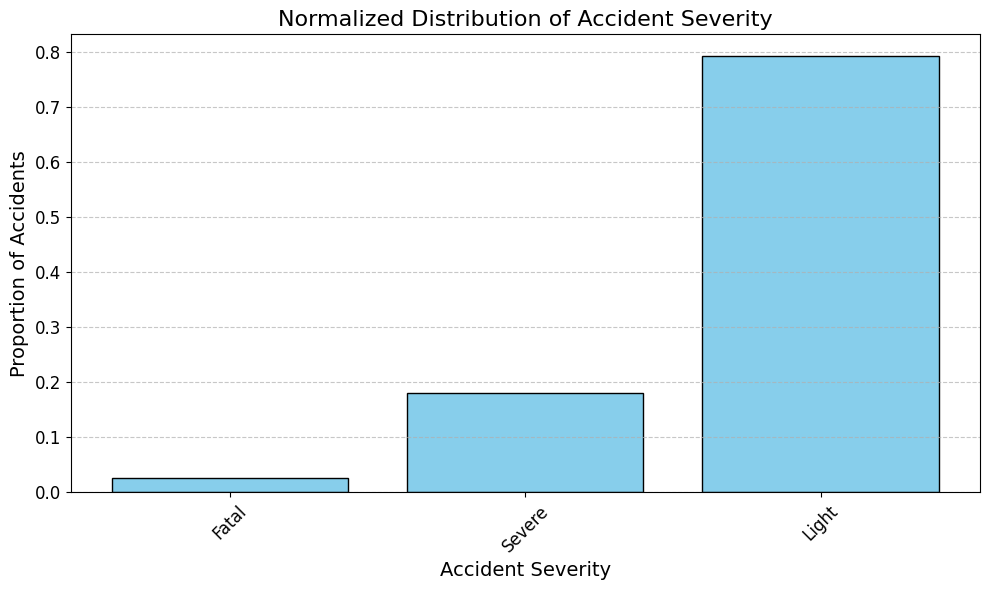

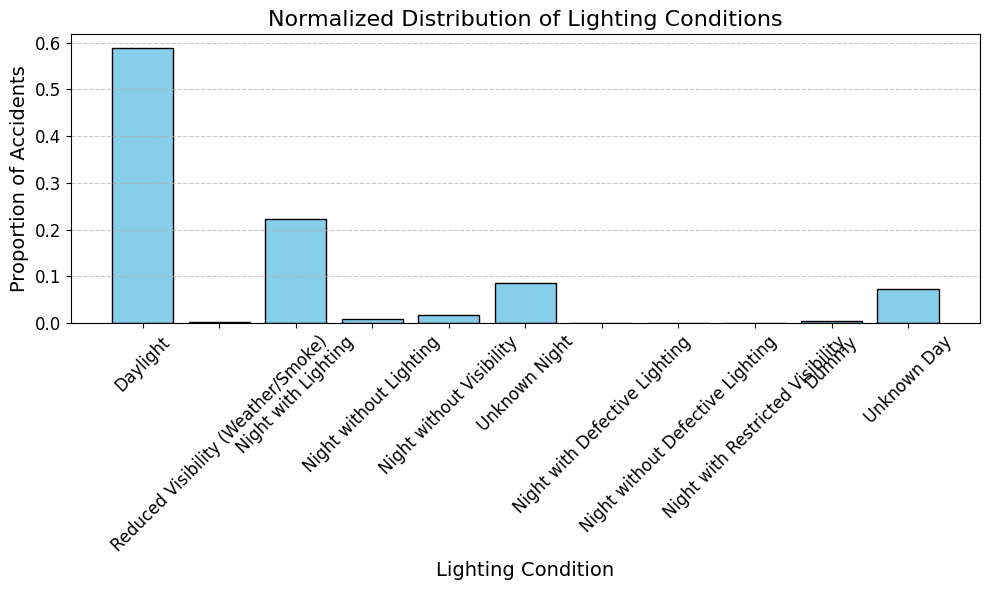

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to datasets for all years
file_paths = {
    2018: './Datasets/data_accidents_israel_by_year/2018/2018_data.csv',
    2019: './Datasets/data_accidents_israel_by_year/2019/2019_data.csv',
    2020: './Datasets/data_accidents_israel_by_year/2020/2020_data.csv',
    2021: './Datasets/data_accidents_israel_by_year/2021/2021_data.csv',
    2022: './Datasets/data_accidents_israel_by_year/2022/2022_data.csv'
}

# List to hold data from all years
all_data = []

# Loop through each year and load the data
for year, path in file_paths.items():
    try:
        # Load the dataset
        data = pd.read_csv(path)
        
        # Add a column for the year to identify data
        data['Year'] = year
        
        # Append to the list
        all_data.append(data)
    except FileNotFoundError:
        print(f"File for {year} not found at path: {path}")
        continue

# Combine all datasets
combined_data = pd.concat(all_data, ignore_index=True)

# Count non-empty rows
non_empty_rows = combined_data.dropna(how='all').shape[0]
print(f"Total number of non-empty rows in the combined dataset: {non_empty_rows}")

# Define mappings for fields
field_mappings = {
    'YOM_BASHAVUA': {
        'mapping': {
            1: "Sunday", 2: "Monday", 3: "Tuesday",
            4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"
        },
        'title': 'Normalized Distribution of Accidents by Day of the Week',
        'xlabel': 'Day of the Week'
    },
    'HODESH_TEUNA': {
        'mapping': {
            1: "January", 2: "February", 3: "March", 4: "April",
            5: "May", 6: "June", 7: "July", 8: "August",
            9: "September", 10: "October", 11: "November", 12: "December"
        },
        'title': 'Normalized Distribution of Accidents by Month',
        'xlabel': 'Month'
    },
    'YOM_LAYLA': {
        'mapping': {
            1: "Day", 5: "Night"
        },
        'title': 'Normalized Distribution of Accidents by Day/Night',
        'xlabel': 'Day or Night'
    } #shira: to check about this
}

# Analyze and plot distributions for each field
for field, details in field_mappings.items():
    # Check if the field exists in the data
    if field not in combined_data.columns:
        print(f"Field '{field}' is missing from the dataset. Skipping...")
        continue

    # Map field values to names
    combined_data[f'{field}_Name'] = combined_data[field].map(details['mapping'])

    # Count occurrences for each category
    field_counts = combined_data[f'{field}_Name'].value_counts().reindex(details['mapping'].values(), fill_value=0)

    # Normalize the values for distribution (0 to 1)
    field_distribution = field_counts / field_counts.sum()

    # Plot the distribution graph
    plt.figure(figsize=(10, 6))
    plt.bar(field_distribution.index, field_distribution.values, edgecolor='black', color='skyblue')
    plt.title(details['title'], fontsize=16)
    plt.xlabel(details['xlabel'], fontsize=14)
    plt.ylabel('Proportion of Accidents', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the graph
    plt.show()

Total number of non-empty rows in the combined dataset: 58060


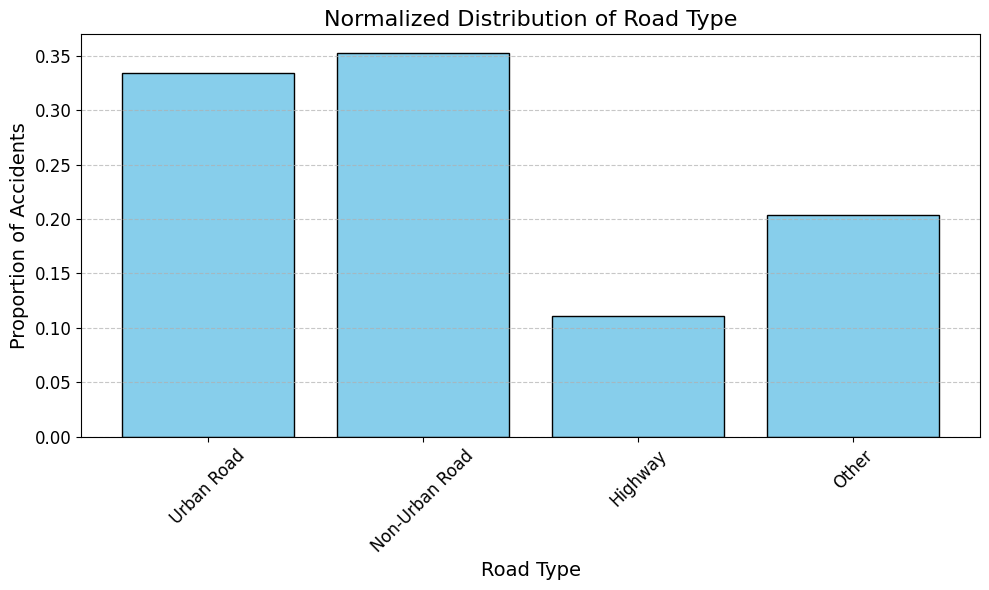

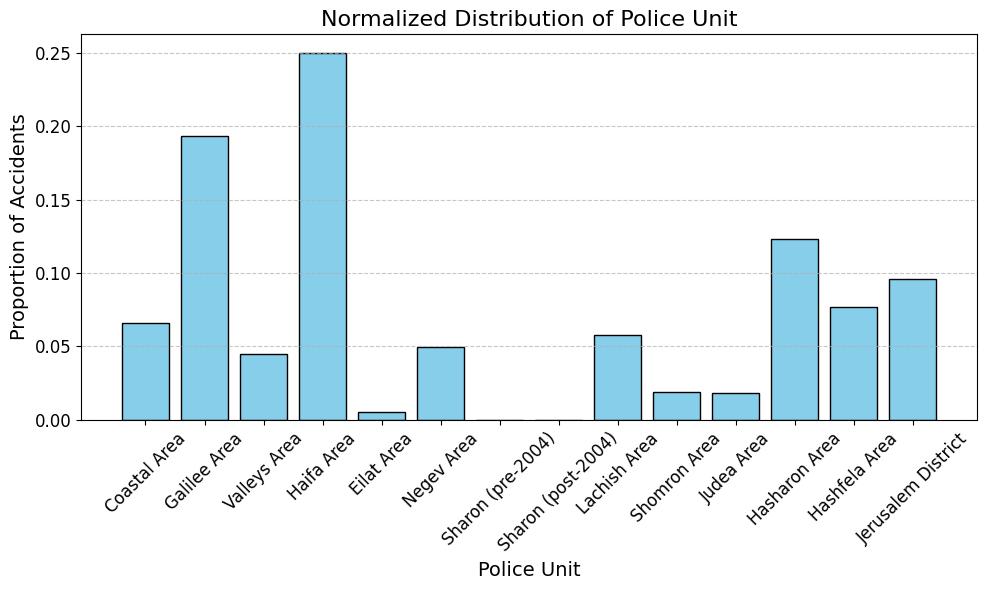

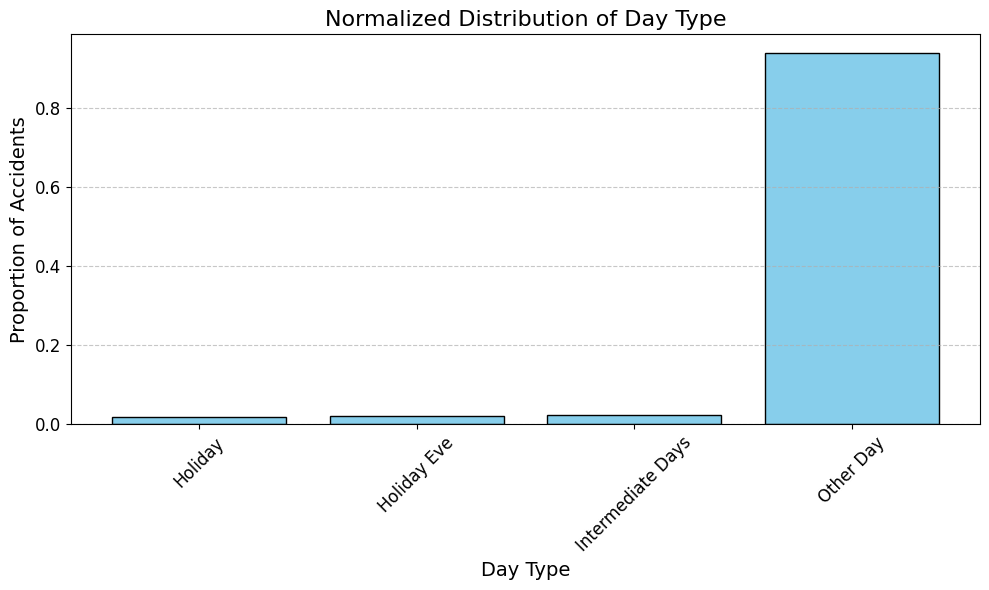

Field 'MERKAZI' is missing from the dataset. Skipping...


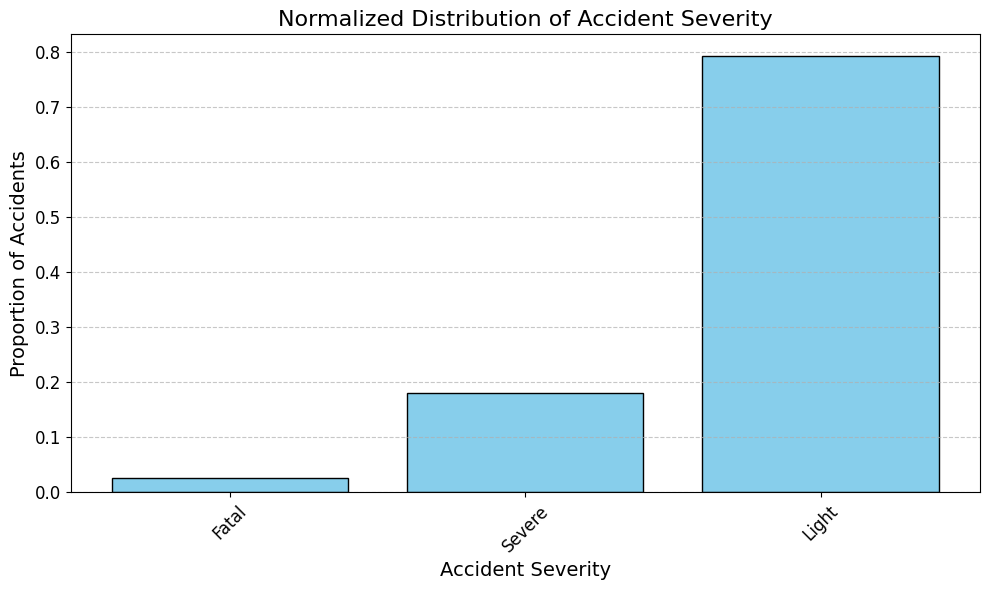

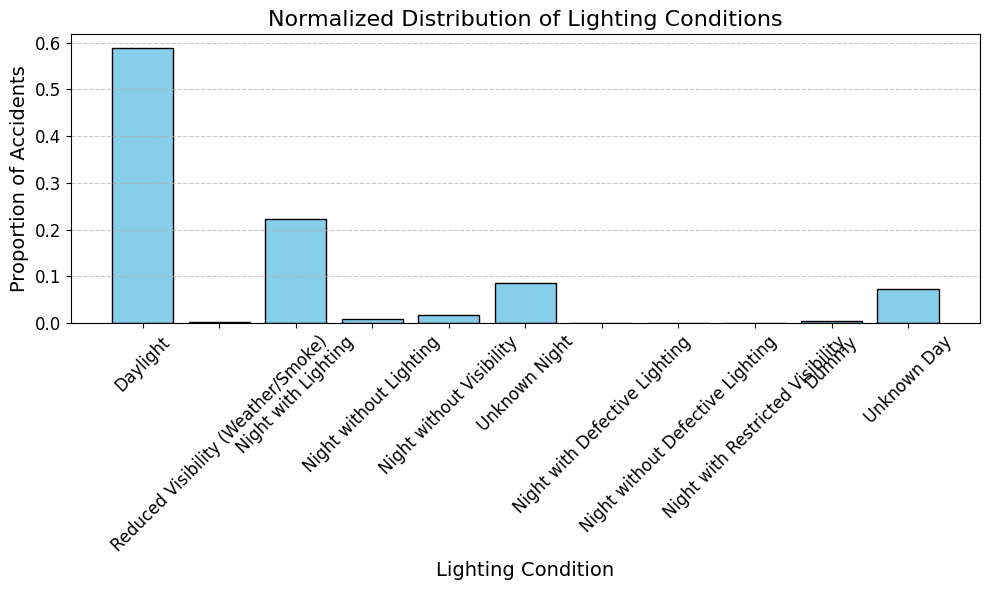

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to datasets for all years
file_paths = {
    2018: './Datasets/data_accidents_israel_by_year/2018/2018_data.csv',
    2019: './Datasets/data_accidents_israel_by_year/2019/2019_data.csv',
    2020: './Datasets/data_accidents_israel_by_year/2020/2020_data.csv',
    2021: './Datasets/data_accidents_israel_by_year/2021/2021_data.csv',
    2022: './Datasets/data_accidents_israel_by_year/2022/2022_data.csv'
}

# List to hold data from all years
all_data = []

# Loop through each year and load the data
for year, path in file_paths.items():
    try:
        # Load the dataset
        data = pd.read_csv(path)
        data['Year'] = year  # Add year column
        all_data.append(data)
    except FileNotFoundError:
        print(f"File for {year} not found at path: {path}")
        continue

# Combine all datasets
combined_data = pd.concat(all_data, ignore_index=True)

# Count non-empty rows
non_empty_rows = combined_data.dropna(how='all').shape[0]
print(f"Total number of non-empty rows in the combined dataset: {non_empty_rows}")

field_mappings = {
    'SUG_DEREH': {
        'mapping': {1: "Urban Road", 2: "Non-Urban Road", 3: "Highway", 4: "Other"},
        'title': 'Normalized Distribution of Road Type',
        'xlabel': 'Road Type'
    },
    'YEHIDA': {
        'mapping': {
            11: "Coastal Area", 12: "Galilee Area", 14: "Valleys Area",
            20: "Haifa Area", 33: "Eilat Area", 34: "Negev Area",
            36: "Sharon (pre-2004)", 37: "Sharon (post-2004)", 38: "Lachish Area",
            41: "Shomron Area", 43: "Judea Area", 51: "Hasharon Area",
            52: "Hashfela Area", 61: "Jerusalem District"
        },
        'title': 'Normalized Distribution of Police Unit',
        'xlabel': 'Police Unit'
    },
    'SUG_YOM': {
        'mapping': {
            1: "Holiday", 2: "Holiday Eve", 3: "Intermediate Days", 4: "Other Day"
        },
        'title': 'Normalized Distribution of Day Type',
        'xlabel': 'Day Type'
    },
    'MERKAZI': {
        'mapping': {1: "Signalized", 2: "Non-Signalized"},
        'title': 'Normalized Distribution of Signalized/Non-Signalized',
        'xlabel': 'Signalized/Non-Signalized'
    },
    'HUMRAT_TEUNA': {
        'mapping': {1: "Fatal", 2: "Severe", 3: "Light"},
        'title': 'Normalized Distribution of Accident Severity',
        'xlabel': 'Accident Severity'
    },
    'TEURA': {
        'mapping': {
            1: "Daylight", 2: "Reduced Visibility (Weather/Smoke)", 3: "Night with Lighting",
            4: "Night without Lighting", 5: "Night without Visibility", 6: "Unknown Night",
            7: "Night with Defective Lighting", 8: "Night without Defective Lighting",
            9: "Night with Restricted Visibility", 10: "Dummy", 11: "Unknown Day"
        },
        'title': 'Normalized Distribution of Lighting Conditions',
        'xlabel': 'Lighting Condition'
    }
}

# Analyze and plot distributions for each field
for field, details in field_mappings.items():
    if field not in combined_data.columns:
        print(f"Field '{field}' is missing from the dataset. Skipping...")
        continue

    # Map field values to names
    combined_data[f'{field}_Name'] = combined_data[field].map(details['mapping'])

    # Count occurrences for each category
    field_counts = combined_data[f'{field}_Name'].value_counts().reindex(details['mapping'].values(), fill_value=0)

    # Normalize the values for distribution (0 to 1)
    field_distribution = field_counts / field_counts.sum()

    # Plot the distribution graph
    plt.figure(figsize=(10, 6))
    plt.bar(field_distribution.index, field_distribution.values, edgecolor='black', color='skyblue')
    plt.title(details['title'], fontsize=16)
    plt.xlabel(details['xlabel'], fontsize=14)
    plt.ylabel('Proportion of Accidents', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the graph
    plt.show()


5.12:

correlation graph: (numpy pandas frame)

correlation_matrix = df.corr()

import seaborn as sns import matplotlib.pyplot as plt # Create a heatmap plt.figure(figsize=(8, 6)) sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") plt.title("Correlation Matrix") plt.show()

plt.figure(figsize=(8, 6)) sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") plt.title("Correlation Matrix") plt.show()

Accident Rates by driver age group:

heatmap :

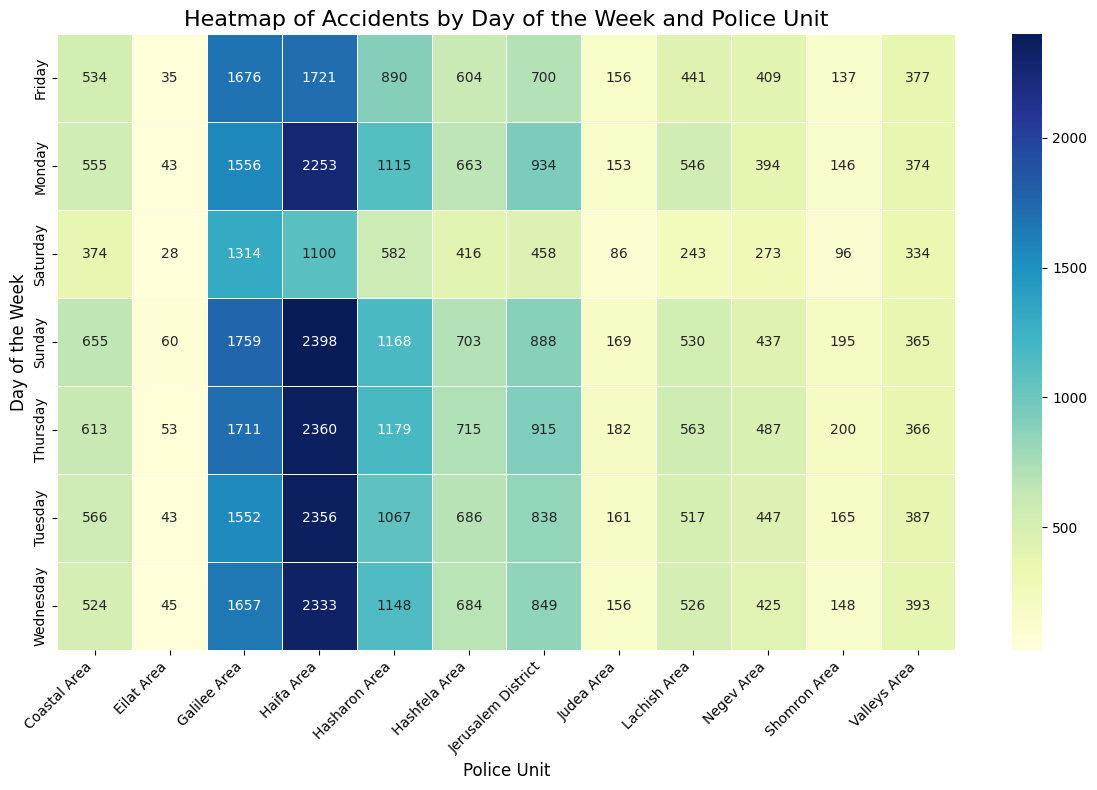

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to datasets for all years
file_paths = {
    2018: './Datasets/data_accidents_israel_by_year/2018/2018_data.csv',
    2019: './Datasets/data_accidents_israel_by_year/2019/2019_data.csv',
    2020: './Datasets/data_accidents_israel_by_year/2020/2020_data.csv',
    2021: './Datasets/data_accidents_israel_by_year/2021/2021_data.csv',
    2022: './Datasets/data_accidents_israel_by_year/2022/2022_data.csv'
}

# Mapping for days of the week (YOM_BASHAVUA)
day_mapping = {
    1: "Sunday", 2: "Monday", 3: "Tuesday",
    4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"
}

# Mapping for Police Unit (YEHIDA)
yehida_mapping = {
    11: "Coastal Area", 12: "Galilee Area", 14: "Valleys Area",
    20: "Haifa Area", 33: "Eilat Area", 34: "Negev Area",
    36: "Sharon (pre-2004)", 37: "Sharon (post-2004)", 38: "Lachish Area",
    41: "Shomron Area", 43: "Judea Area", 51: "Hasharon Area",
    52: "Hashfela Area", 61: "Jerusalem District"
}

# Load and combine all datasets
all_data = []
for year, path in file_paths.items():
    try:
        data = pd.read_csv(path)
        data['Year'] = year
        all_data.append(data)
    except FileNotFoundError:
        print(f"File for {year} not found at path: {path}")
        continue

# Combine all datasets
combined_data = pd.concat(all_data, ignore_index=True)

# Filter relevant columns
heatmap_data = combined_data[['YOM_BASHAVUA', 'YEHIDA']].dropna()

# Map the values to their names
heatmap_data['YOM_BASHAVUA'] = heatmap_data['YOM_BASHAVUA'].map(day_mapping)
heatmap_data['YEHIDA'] = heatmap_data['YEHIDA'].map(yehida_mapping)

# Create a pivot table for the heatmap
pivot_table = heatmap_data.groupby(['YOM_BASHAVUA', 'YEHIDA']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap of Accidents by Day of the Week and Police Unit", fontsize=16)
plt.xlabel("Police Unit", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()


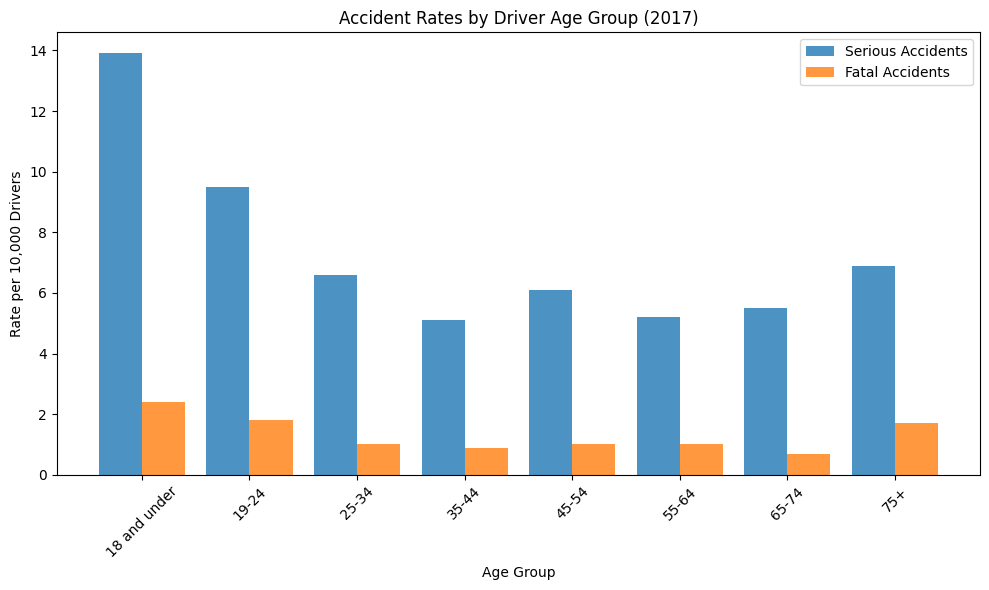

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the graph
data = {
    "Age Group": ["18 and under", "19-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"],
    "Serious Accidents": [13.9, 9.5, 6.6, 5.1, 6.1, 5.2, 5.5, 6.9],
    "Fatal Accidents": [2.4, 1.8, 1.0, 0.9, 1.0, 1.0, 0.7, 1.7]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))
bar_width = 0.4
age_indices = range(len(df["Age Group"]))

plt.bar(age_indices, df["Serious Accidents"], width=bar_width, label="Serious Accidents", alpha=0.8)
plt.bar([i + bar_width for i in age_indices], df["Fatal Accidents"], width=bar_width, label="Fatal Accidents", alpha=0.8)

# Add labels and legend
plt.xlabel("Age Group")
plt.ylabel("Rate per 10,000 Drivers")
plt.title("Accident Rates by Driver Age Group (2017)")
plt.xticks([i + bar_width / 2 for i in age_indices], df["Age Group"], rotation=45)
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()




```
# This is formatted as code
```



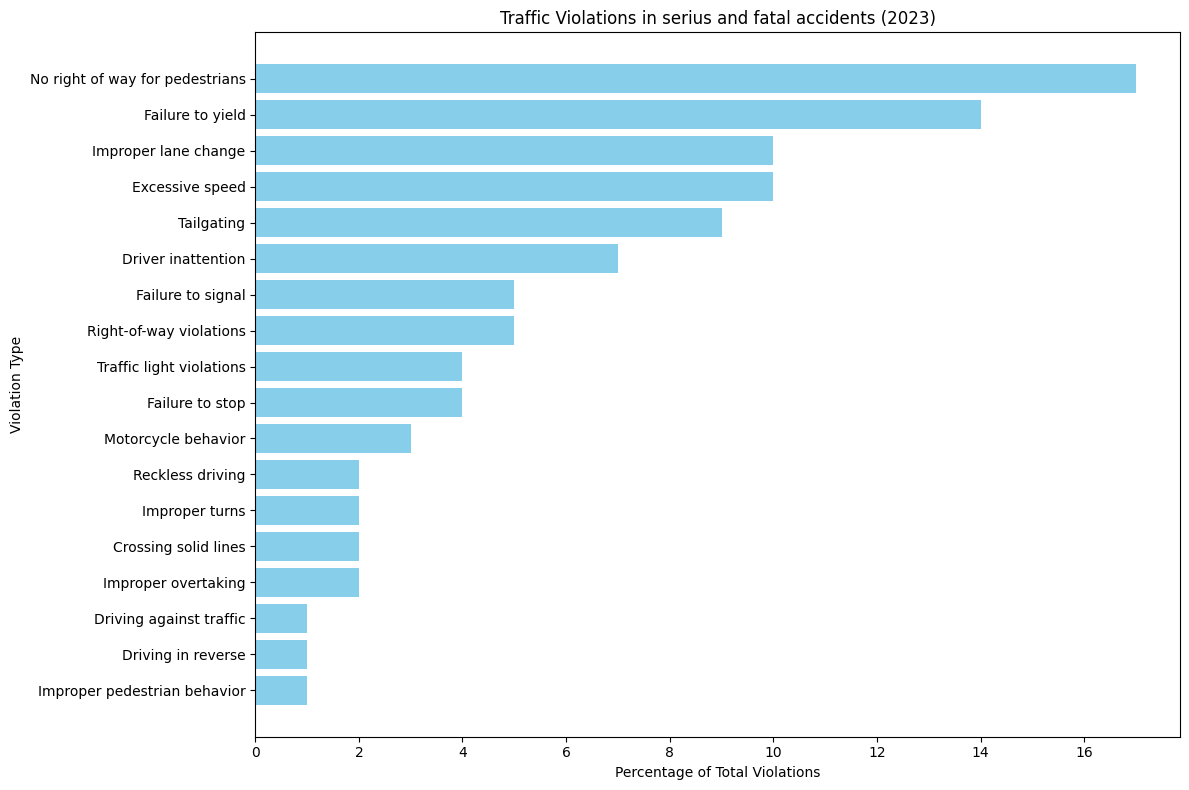

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Data manually interpreted from the table
data_table = {
    "Violation Type": [
        "No right of way for pedestrians", "Failure to yield",
        "Improper lane change", "Excessive speed",
        "Tailgating", "Driver inattention",
        "Failure to signal", "Right-of-way violations",
        "Traffic light violations", "Failure to stop",
        "Motorcycle behavior", "Reckless driving",
        "Improper turns", "Crossing solid lines",
        "Improper overtaking", "Driving against traffic",
        "Driving in reverse", "Improper pedestrian behavior"
    ],
    "Percentage": [
        17, 14, 10, 10, 9, 7, 5, 5,
        4, 4, 3, 2, 2, 2, 2, 1, 1, 1
    ]
}

# Create a DataFrame
df_table = pd.DataFrame(data_table)

# Plot the normalized distribution
plt.figure(figsize=(12, 8))
plt.barh(df_table["Violation Type"], df_table["Percentage"], color="skyblue")
plt.xlabel("Percentage of Total Violations")
plt.ylabel("Violation Type")
plt.title("Traffic Violations in serius and fatal accidents (2023)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Display the graph
plt.tight_layout()
plt.show()


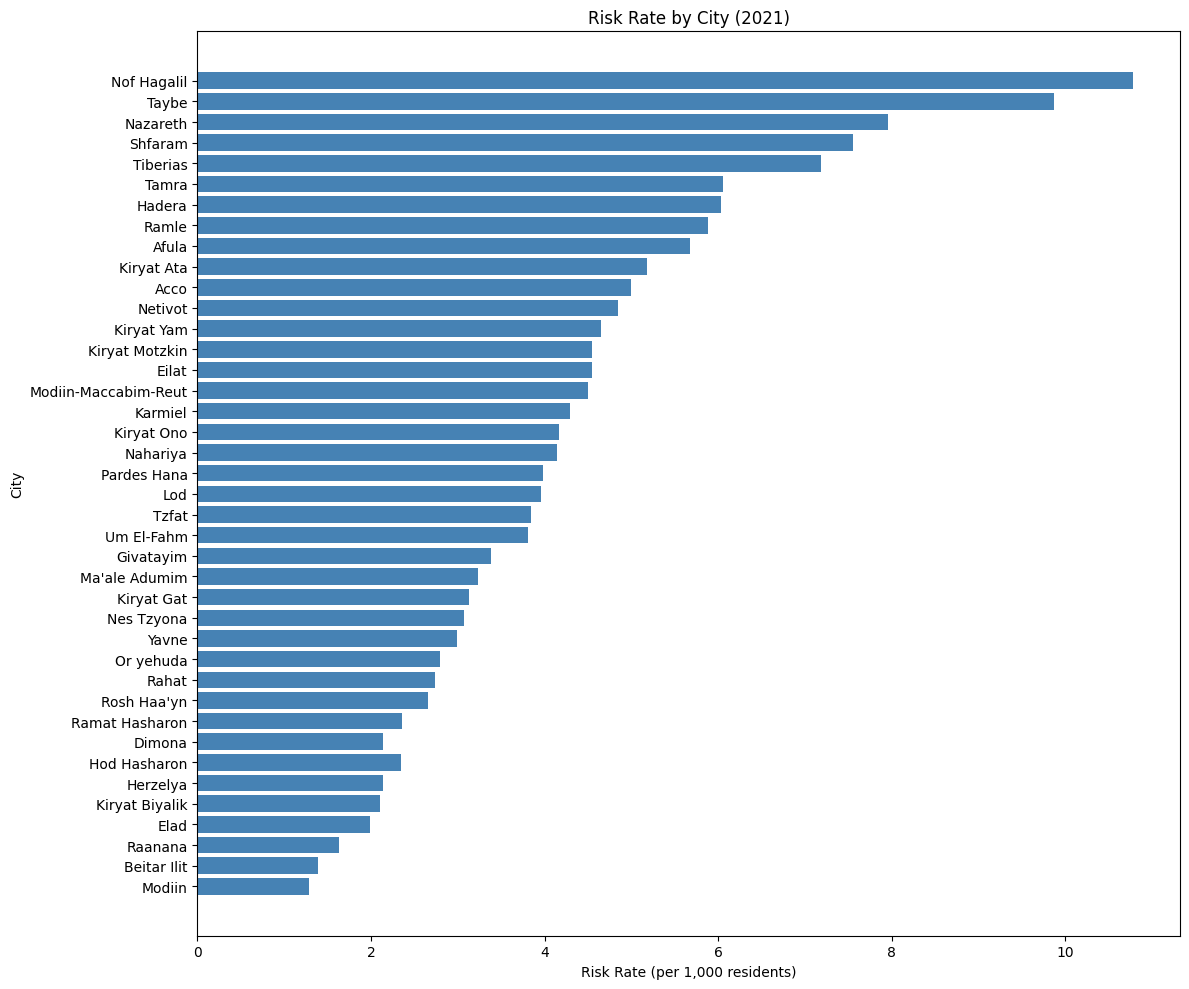

In [148]:
# Manually reconstructed data based on visual inspection of the chart
data_cities = {
    "City": [
        "Nof Hagalil", "Taybe", "Nazareth", "Shfaram", "Tiberias",
        "Tamra", "Hadera", "Ramle", "Afula", "Kiryat Ata",
        "Acco", "Netivot", "Kiryat Yam","Kiryat Motzkin", "Eilat",
        "Modiin-Maccabim-Reut", "Karmiel", "Kiryat Ono","Nahariya", "Pardes Hana",
        "Lod","Tzfat", "Um El-Fahm", "Givatayim", "Ma'ale Adumim", "Kiryat Gat","Nes Tzyona",
        "Yavne", "Or yehuda","Rahat","Rosh Haa'yn", "Ramat Hasharon","Dimona","Hod Hasharon", "Herzelya",
        "Kiryat Biyalik","Elad", "Raanana", "Beitar Ilit", "Modiin"],
    "Risk Rate (per 1,000)": [
        10.78, 9.87, 7.96, 7.55, 7.18, 6.06, 6.03, 5.88, 5.67,5.18, 4.99,
        4.85, 4.65, 4.55, 4.54, 4.50, 4.29, 4.17, 4.14, 3.98, 3.96,
        3.84,3.81, 3.38, 3.23, 3.13, 3.07, 2.99, 2.80,2.74, 2.66, 2.36, 2.14,2.35,
        2.14,2.10,1.99,1.63,1.39,1.28]
}

# Create a DataFrame
df_cities = pd.DataFrame(data_cities)

# Plot the normalized distribution
plt.figure(figsize=(12, 10))
plt.barh(df_cities["City"], df_cities["Risk Rate (per 1,000)"], color="steelblue")
plt.xlabel("Risk Rate (per 1,000 residents)")
plt.ylabel("City")
plt.title("Risk Rate by City (2021)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Display the graph
plt.tight_layout()
plt.show()


In [149]:
% נתונים לגרף
hours = {'00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', ...
         '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', ...
         '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', ...
         '21-22', '22-23', '23-24'};
severe_accidents = [44, 32, 24, 20, 20, 30, 50, 92, 98, 93, 94, 106, 121, ...
                    120, 132, 136, 138, 139, 133, 129, 114, 98, 82, 72, 60];
fatal_accidents = [10, 8, 5, 5, 6, 8, 11, 13, 13, 13, 13, 15, 15, 16, 16, ...
                   17, 17, 19, 19, 16, 15, 12, 11, 11, 14];

% יצירת גרף עמודות מקונן
figure;
data = [severe_accidents; fatal_accidents]';
bar(data, 'stacked');
grid on;

% התאמת צבעים
colormap([1 0.5 0; 0.8 0 0]); % כתום לתאונות קשות, אדום לתאונות קטלניות

% כותרות ותוויות
set(gca, 'XTick', 1:length(hours), 'XTickLabel', hours, 'XTickLabelRotation', 45, 'FontSize', 10);
ylabel('מספר תאונות', 'FontSize', 12);
xlabel('שעה ביממה', 'FontSize', 12);
title('תאונות קשות וקטלניות לפי שעה ביום וחומרה (ממוצע 2022-2013)', 'FontSize', 14);

% הוספת אגדה
legend({'תאונות קשות', 'תאונות קטלניות'}, 'FontSize', 10, 'Location', 'northoutside', 'Orientation', 'horizontal');

% הוספת מספרים מעל העמודות
hold on;
for i = 1:length(hours)
    total = severe_accidents(i) + fatal_accidents(i);
    text(i, total + 5, num2str(total, '%.0f'), 'HorizontalAlignment', 'center', 'FontSize', 10);
end
hold off;

% שיפור הצגת הצירים
xlim([0.5 length(hours) + 0.5]); % שמירה על ריווח בין עמודות
ylim([0 max(severe_accidents + fatal_accidents) + 20]); % התאמת טווח הציר האנכי

SyntaxError: unterminated string literal (detected at line 13) (548460831.py, line 13)

This chart displays the number of accidents categorized by hours of the day. It highlights the distribution of severe and fatal accidents across different times, showing that most accidents occur during daytime hours. There is a noticeable increase during rush hours, particularly in the afternoon, with a peak at 6:00 PM, likely due to traffic congestion, driver fatigue, and the variety of road users during these hours.


In [41]:
% Data
hours = {'00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07','07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21','21-22', '22-23', '23-24'};
severe_accidents = [44, 32, 24, 20, 20, 30, 50, 92, 98, 93, 94, 106, 121, 120, 132, 136, 138, 139, 133, 129, 114, 98, 82, 72, 60];
fatal_accidents = [10, 8, 5, 5, 6, 8, 11, 13, 13, 13, 13, 15, 15, 16, 16, 17, 17, 19, 19, 16, 15, 12, 11, 11, 14];

% Creating the graph
figure;
data = [severe_accidents; fatal_accidents]';
bar(data, 'stacked');
grid on;

% Customizing colors
colormap([1 0.5 0; 0.8 0 0]); % Orange for severe accidents, red for fatal accidents

% Titles and labels
set(gca, 'XTick', 1:length(hours), 'XTickLabel', hours, 'XTickLabelRotation', 45, 'FontSize', 10);
ylabel('Number of accidents', 'FontSize', 12);
xlabel('Hour of the day', 'FontSize', 12);
title('Severe and Fatal Accidents by Hour of the Day (Average 2013-2022)', 'FontSize', 14);

% Adding a legend
legend({'Severe Accidents', 'Fatal Accidents'}, 'FontSize', 10, 'Location', 'northoutside', 'Orientation', 'horizontal');

% Adding numbers above the bars
hold on;
for i = 1:length(hours)
    total = severe_accidents(i) + fatal_accidents(i);
    text(i, total + 5, num2str(total, '%.0f'), 'HorizontalAlignment', 'center', 'FontSize', 10);
end
hold off;

% Adjusting axis limits
xlim([0.5 length(hours) + 0.5]); % Ensure spacing between bars
ylim([0 max(severe_accidents + fatal_accidents) + 20]); % Adjust y-axis range

SyntaxError: invalid syntax (673607694.py, line 8)

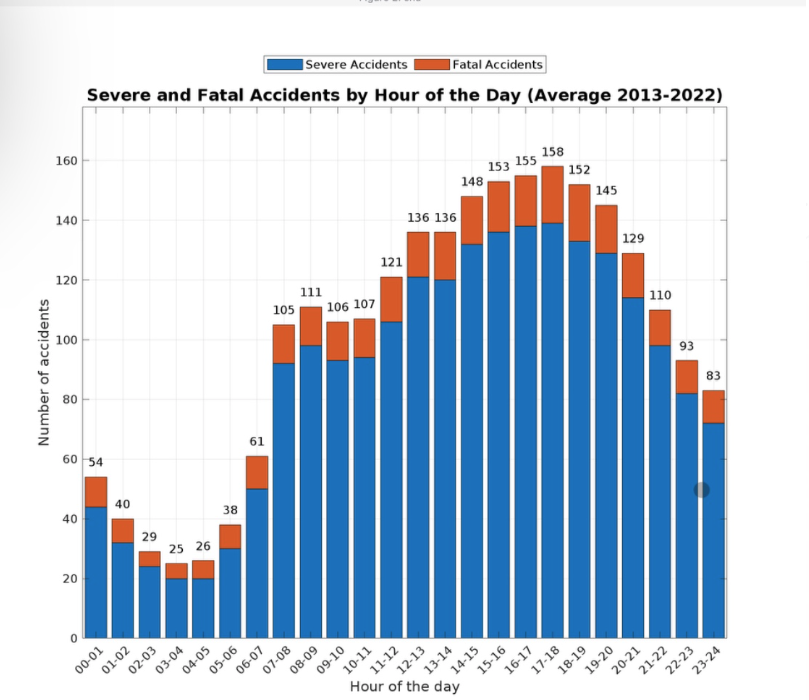